In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA

import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from scipy import interpolate
import pickle
import glob
import os
from sklearn.cluster import DBSCAN

from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler

In [4]:
img=cv2.imread("/home/avengers/Desktop/gray.jpeg",0)

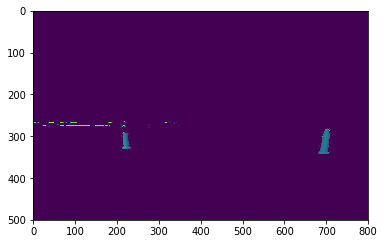

In [5]:
plt.imshow(img)

In [6]:
nonzero = img.nonzero()
yp = np.array(nonzero[0])
xp = np.array(nonzero[1])

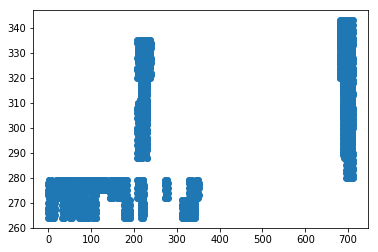

In [7]:
plt.scatter(xp,yp)

In [23]:
X=np.column_stack((xp,yp))
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

array([0, 0, 0, ..., 5, 5, 5])

In [24]:
print len(X)

3811


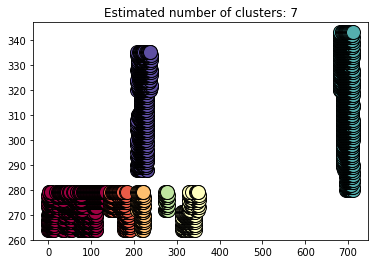

In [29]:
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=3, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)



# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()